In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
import seaborn as sns
sns.set_theme(style="ticks", font_scale=1.5)
import os
import json
from datetime import datetime
import inspect
import os
import sys
sys.path.append('../Classes')
from my_model_class import Model
from my_solving_class import Solving

import colorsys
import matplotlib.colors as mcolors

In [2]:
m1 = Model()
s1 = Solving(m1)

# red = '#d62728'
# blue = '#0484d0'

red = ['#fda2b7', '#d10333', '#6c011a']
yellow = ['#fbce36', '#f9c105', '#c79b04']
# blue = ['#71c8fc', '#0484d0', '#02456c']
blue = ['#3fb5fb', '#0384d0', '#02456c']

TC_values = [0, 0.4]
p = np.linspace(2/180, 800/180, 500)



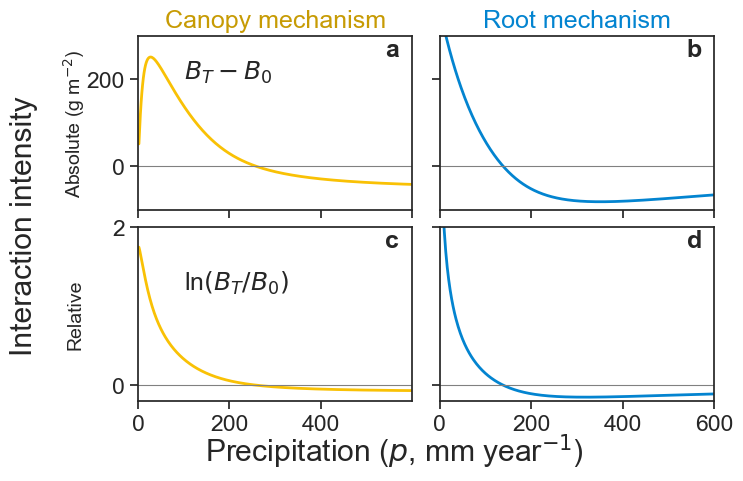

In [3]:
# ──────────────────────────────────────────────────────────
# 1. FIGURE & AXES
# ──────────────────────────────────────────────────────────
fig, axes = plt.subplots(2, 2, figsize=(8, 5))#, sharex='col', sharey='row')
fig.subplots_adjust(left=0.18, bottom=0.15, wspace=0.10, hspace=0.10)
ax0, ax1, ax2, ax3 = axes.flatten()          # L-top, R-top, L-bot, R-bot

# ──────────────────────────────────────────────────────────
# 2. PRE-COMPUTE INTENSITIES (tree vs shading)
# ──────────────────────────────────────────────────────────
m1.params.update(tree=True,  tree_is='both', Shading=0)
real_tree, log_tree = s1.solve_interaction_intensity(TC_values, p)

m1.params.update(tree=False, Shading=1)
real_sh , log_sh  = s1.solve_interaction_intensity(TC_values, p)

# ──────────────────────────────────────────────────────────
# 3. PLOT & STYLE — GROUPED BY AXIS
# ──────────────────────────────────────────────────────────
# ---------- ax0  :  shading • real  -----------------------
lw = 2
for arr in real_sh:
    ax0.plot(p*180, arr, color=yellow[1], lw=lw)
ax0.axhline(0, color='gray', lw=0.8)
# ---------- ax1  :  tree    • real  -----------------------
for arr in real_tree:
    ax1.plot(p*180, arr, color=blue[1], lw=lw)
ax1.axhline(0, color='gray', lw=0.8)
# ---------- ax2  :  shading • log   -----------------------
for arr in log_sh:
    ax2.plot(p*180, arr, color=yellow[1], lw=lw)
ax2.axhline(0, color='gray', lw=0.8)
# ---------- ax3  :  tree    • log   -----------------------
for arr in log_tree:
    ax3.plot(p*180, arr, color=blue[1], lw=lw)
ax3.axhline(0, color='gray', lw=0.8)

ax0.text(0.9, 0.88, 'a', transform=ax0.transAxes, fontsize=18, weight='bold')
ax1.text(0.9, 0.88, 'b', transform=ax1.transAxes, fontsize=18, weight='bold')
ax2.text(0.9, 0.88, 'c', transform=ax2.transAxes, fontsize=18, weight='bold')
ax3.text(0.9, 0.88, 'd', transform=ax3.transAxes, fontsize=18, weight='bold')

ax0.set(xlim=(p.min()*180, 600),
    ylim=(-100, 300),
    xticks=[0, 200, 400, 600],
    xticklabels=[])
ax0.set_ylabel(r'Absolute (g m$^{-2}$)', labelpad=0, fontsize=14)          # left-column y-label
ax0.set_title('Canopy mechanism', color=yellow[2])
ax1.set(xlim=(p.min()*180, 600),
    ylim=(-100, 300),
    xticks=[0, 200, 400, 600],
    xticklabels=[],
    yticklabels=[])
ax1.set_title('Root mechanism', color=blue[1])
ax2.set(xlim=(p.min()*180, 600),
    ylim=(-0.2, 2),
    xticks=[0, 200, 400])
ax2.set_ylabel('Relative', labelpad=20, fontsize=14)  # extra spacing
ax3.set(xlim=(p.min()*180, 600),
    ylim=(-0.2, 2),
    xticks=[0, 200, 400, 600],
    yticklabels=[])
ax0.set_yticks([0, 200])
ax1.set_yticks([0, 200])
ax2.set_yticks([0, 2])
ax3.set_yticks([0, 2])

ax0.text(100, 200, r'$B_T-B_0$')
ax2.text(100, 1.2, r'ln$(B_T/B_0)$')

# ──────────────────────────────────────────────────────────
# 4. GLOBAL LABEL & SAVE
# ──────────────────────────────────────────────────────────
fig.supxlabel(r'Precipitation ($\mathit{p}$, mm year$^{-1}$)')
fig.supylabel('Interaction intensity')#, fontsize=20)  # extra spacing
# plt.tight_layout()
# fig.tight_layout
fig.savefig('interaction_intensity.png', dpi=300, bbox_inches='tight')
fig.savefig('interaction_intensity.pdf',          bbox_inches='tight')